In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Read the dataset

In [28]:
df=pd.read_csv("doctor_book.csv")

In [29]:
df.head(10)

,PATIENT ID,PATIENT NAME,GENDER,AGE,APPOINTMENT DAY,HYPER TENSION,DIABETES,ALCOHOLISM,HANDICAPPED,PRIVATE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5642903.0,Bhagya Lakshmi,F,29.0,29-04-2016,1.0,0.0,0.0,0.0,yes
2,5642549.0,Sandhya,F,20.0,19-03-2013,0.0,0.0,0.0,0.0,yes
3,5642828.0,Rafi,M,33.0,12-04-2015,0.0,0.0,0.0,0.0,no
4,5642494.0,Soujanya,F,26.0,23-06-2016,0.0,1.0,0.0,0.0,no
5,5642910.0,Sultan,M,35.0,05-07-2017,0.0,0.0,0.0,0.0,no
6,5642678.0,Prasad,M,46.0,10-11-2019,1.0,1.0,0.0,0.0,yes
7,5642835.0,Yohaan,M,23.0,17-09-2020,1.0,1.0,0.0,0.0,no
8,5642756.0,Naga Lakshmi,F,41.0,24-02-2022,0.0,1.0,0.0,0.0,yes
9,5642503.0,Zahira,F,25.0,09-06-2023,1.0,1.0,0.0,0.0,yes


# Display complete information about the columns of the dataset such as Column name,Count,Data type and over all memory usage

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PATIENT ID       9 non-null      float64
 1   PATIENT NAME     9 non-null      object 
 2   GENDER           9 non-null      object 
 3   AGE              9 non-null      float64
 4   APPOINTMENT DAY  9 non-null      object 
 5   HYPER TENSION    9 non-null      float64
 6   DIABETES         9 non-null      float64
 7   ALCOHOLISM       9 non-null      float64
 8   HANDICAPPED      9 non-null      float64
 9   PRIVATE          9 non-null      object 
dtypes: float64(6), object(4)
memory usage: 1008.0+ bytes


# Find out the total no.of people based on their count of hyper tension

In [31]:
df["HYPER TENSION"].value_counts()

0.0    5
1.0    4
Name: HYPER TENSION, dtype: int64

In [32]:
df["GENDER"].value_counts()

F    5
M    4
Name: GENDER, dtype: int64

# Visualize and analyse the maximum,minimum and medium age

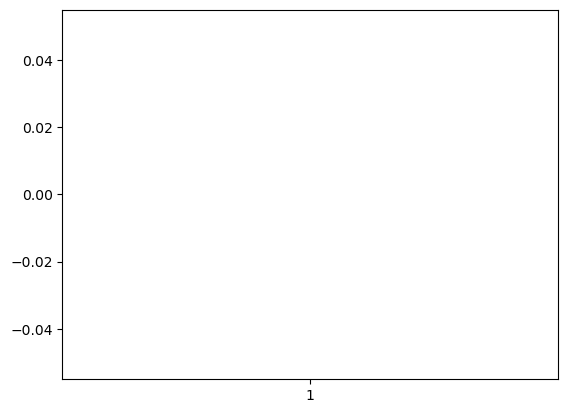

In [33]:
y=list(df.AGE)
plt.boxplot(y)
plt.show()

# Find out the activity of male and female seperately due to Hyper Tension

In [34]:
df.groupby(['GENDER','HYPER TENSION']).mean()

C:\Users\narra\AppData\Local\Temp\ipykernel_10144\273755013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['GENDER','HYPER TENSION']).mean()


PATIENT ID    AGE  DIABETES  ALCOHOLISM  HANDICAPPED
GENDER HYPER TENSION                                                       
F      0.0            5.642600e+06  29.0  0.666667         0.0          0.0
       1.0            5.642703e+06  27.0  0.500000         0.0          0.0
M      0.0            5.642869e+06  34.0  0.000000         0.0          0.0
       1.0            5.642756e+06  34.5  1.000000         0.0          0.0

# Visualize is there is any missing values in the dataset based on a heat map

<Axes: >

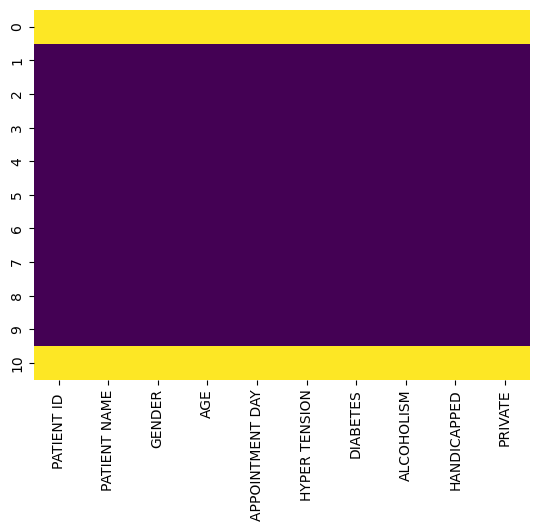

In [35]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Find out the correlation between variables in the given dataset correlation between different variables

C:\Users\narra\AppData\Local\Temp\ipykernel_10144\3642123194.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,cmap='Blues')


<Axes: >

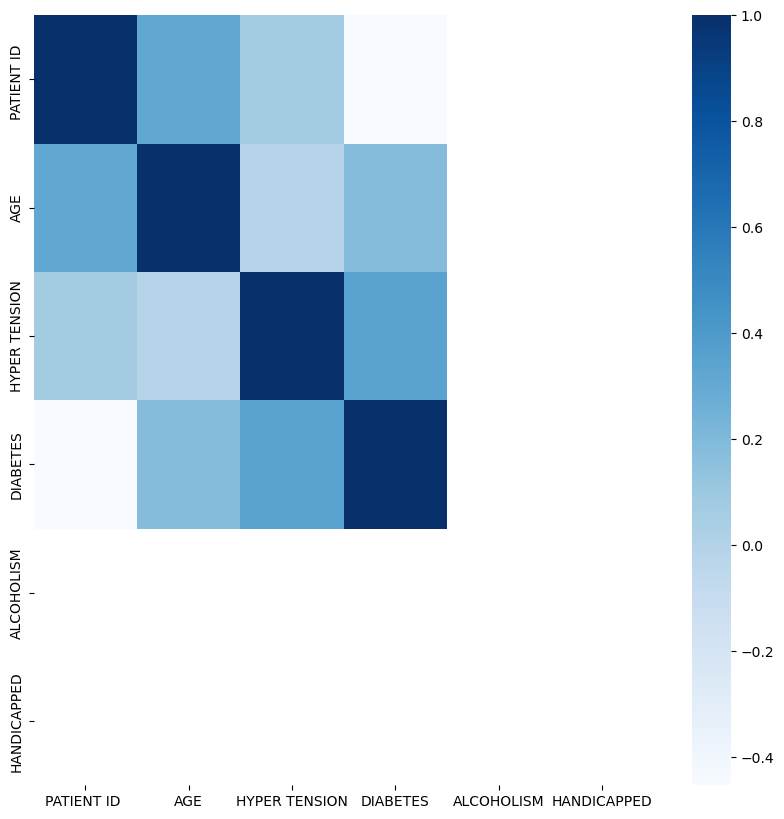

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,cmap='Blues')

# Analyse how the age of a patient affects the diabetes of the patient

Text(0, 0.5, 'DIABETES')

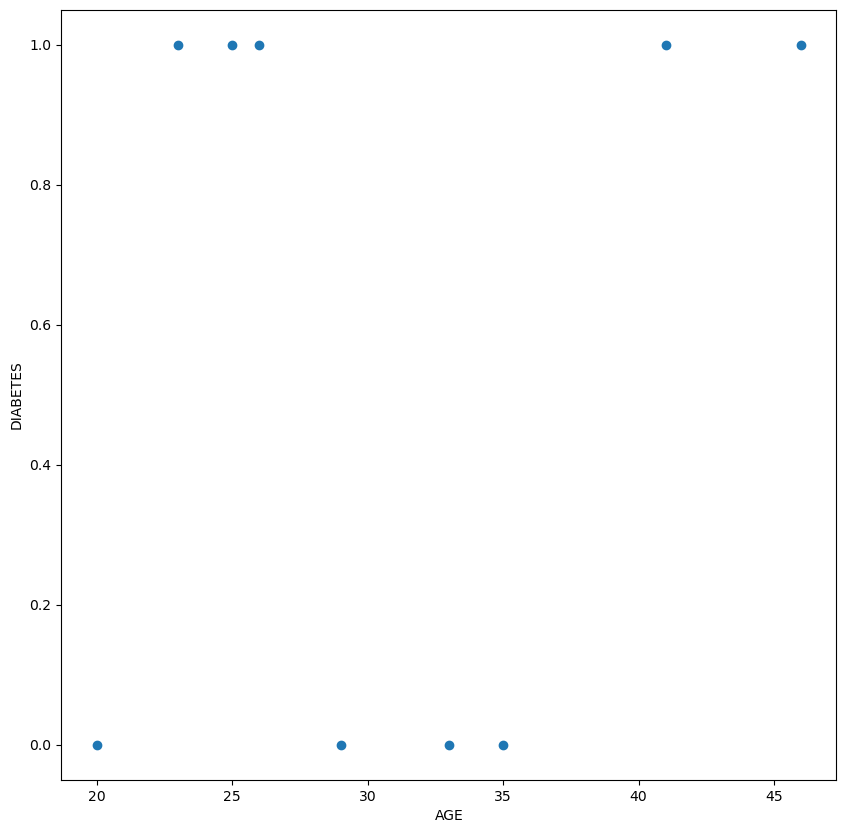

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(x='AGE',y='DIABETES',data=df)
plt.xlabel('AGE')
plt.ylabel('DIABETES')

# Count and visualize the number of males and females affected by diabetes

<Axes: xlabel='GENDER', ylabel='Count'>

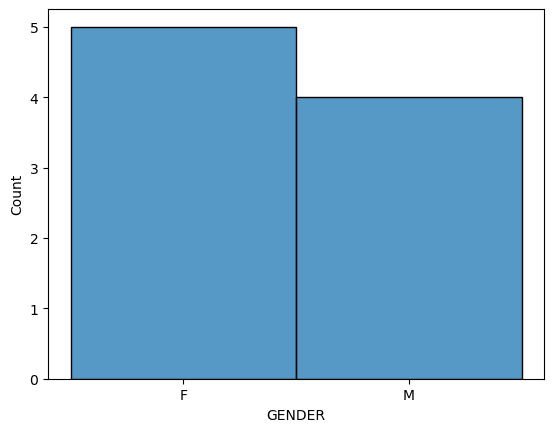

In [38]:
sns.histplot(df.GENDER,bins=2)

# m

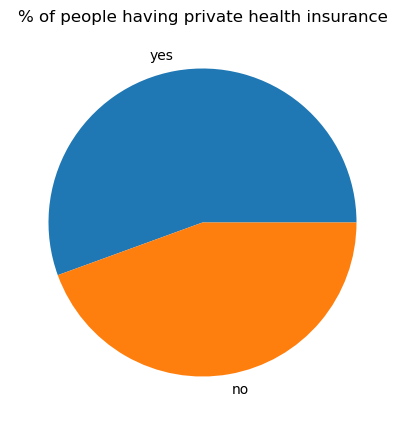

In [39]:
label=['yes','no']
Y=df[df['PRIVATE']=='yes']
N=df[df['PRIVATE']=='no']
X=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(X,labels=label)
plt.title("% of people having private health insurance")
plt.show()

# plot a horizontal bar chart to analyze the diabetes of activity due to age based on gender

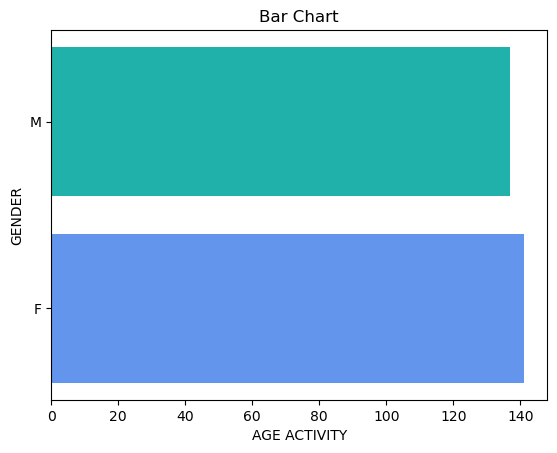

In [41]:
db=df.groupby('GENDER')['AGE'].sum().to_frame().reset_index()
plt.barh(db['GENDER'],db['AGE'],color=['cornflowerblue','lightseagreen'])
plt.title('Bar Chart')
plt.xlabel('AGE ACTIVITY')
plt.ylabel('GENDER')
plt.show()